## 1. Get webpage using *requests*

In [55]:
path = 'https://www.zumper.com/blog/rental-price-data/'

In [38]:
import requests # http requests
from bs4 import BeautifulSoup # Webscrape
from collections import defaultdict # Default dictionary: store a list with each key
import pandas as pd   

In [50]:
headers = {
    "User-agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36"}

In [56]:
response = requests.get(path, headers=headers)


In [58]:
html = response.text

In [57]:
response

<Response [200]>

'<!doctype html >\n<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->\n<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-US"> <!--<![endif]-->\n<head>\n    <meta charset="UTF-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <link rel="pingback" href="https://www.zumper.com/blog/xmlrpc.php" />\n    <script data-cfasync="false" data-no-defer="1">var ewww_webp_supported=!1;function check_webp_feature(A,e){var w;e=void 0!==e?e:function(){},ewww_webp_supported?e(ewww_webp_supported):((w=new Image).onload=function(){ewww_webp_supported=0<w.width&&0<w.height,e&&e(ewww_webp_supported)},w.onerror=function(){e&&e(!1)},w.src="data:image/webp;base64,"+{alpha:"UklGRkoAAABXRUJQVlA4WAoAAAAQAAAAAAAAAAAAQUxQSAwAAAARBxAR/Q9ERP8DAABWUDggGAAAABQBAJ0BKgEAAQAAAP4AAA3AAP7mtQAAAA=="}[A])}check_webp_feature("alpha");</script><script data-cfasync="false" data-no-defer="1">var Arrive=function(c,w){"use strict";if(c.Mu
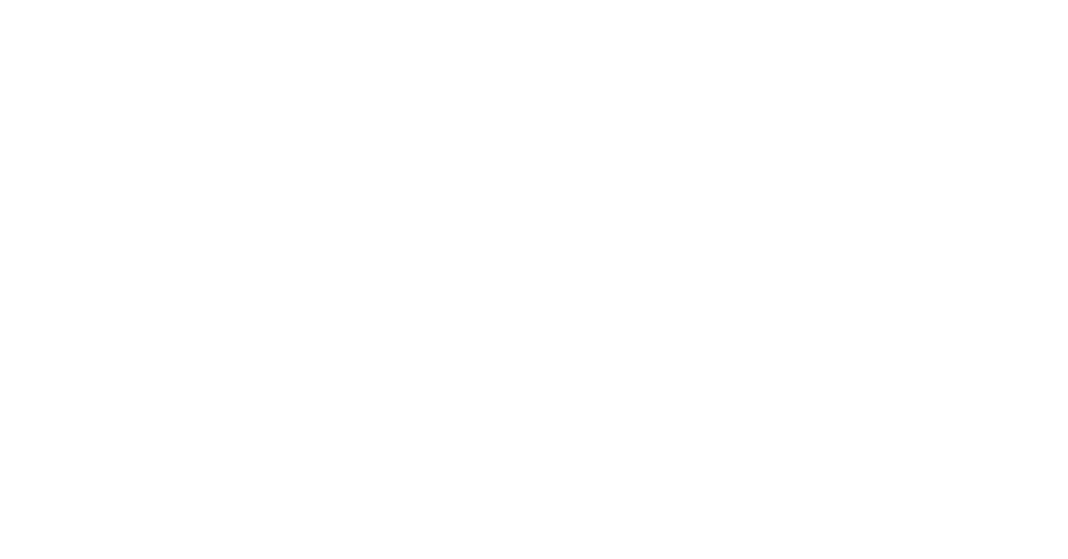
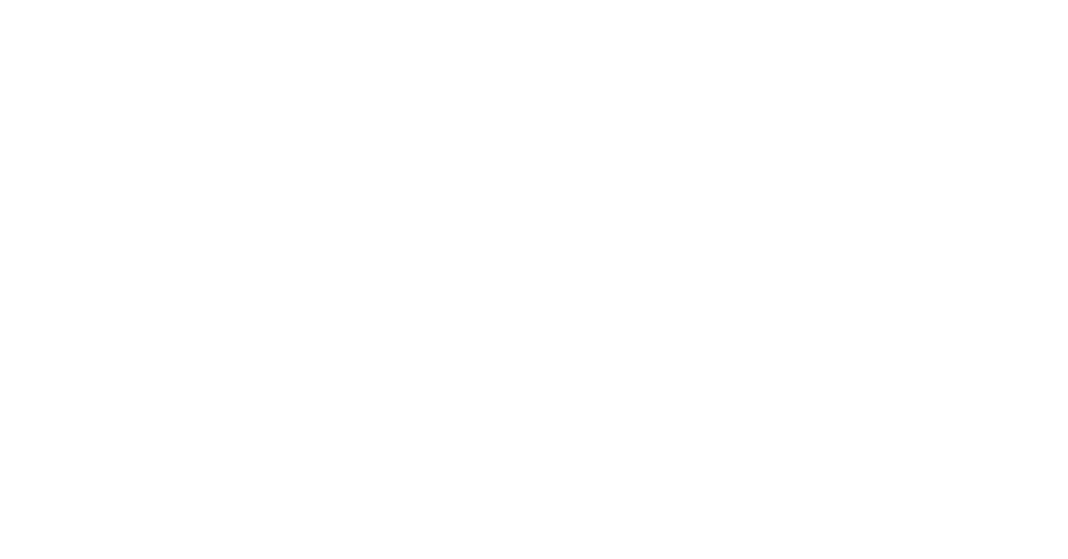
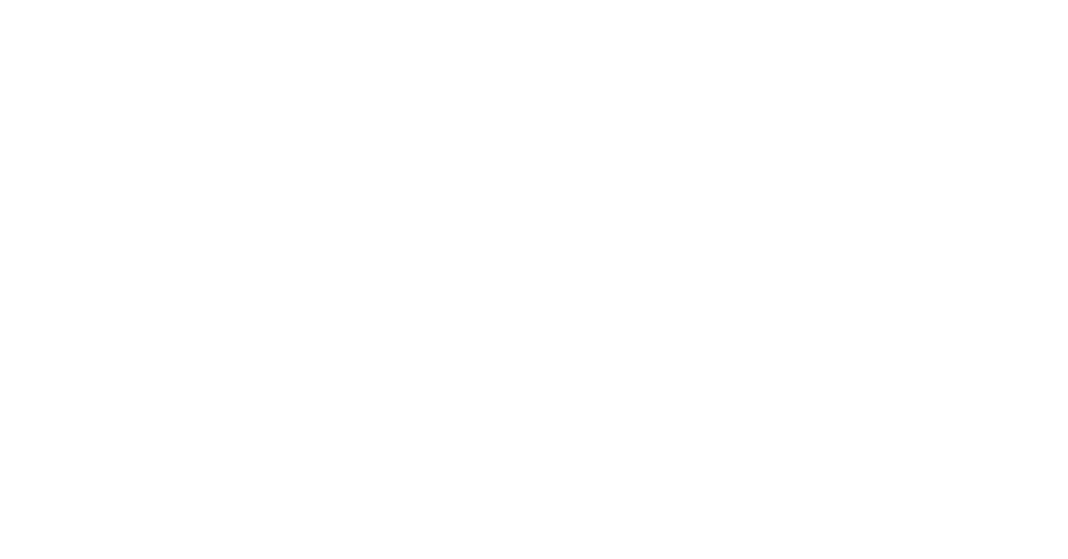
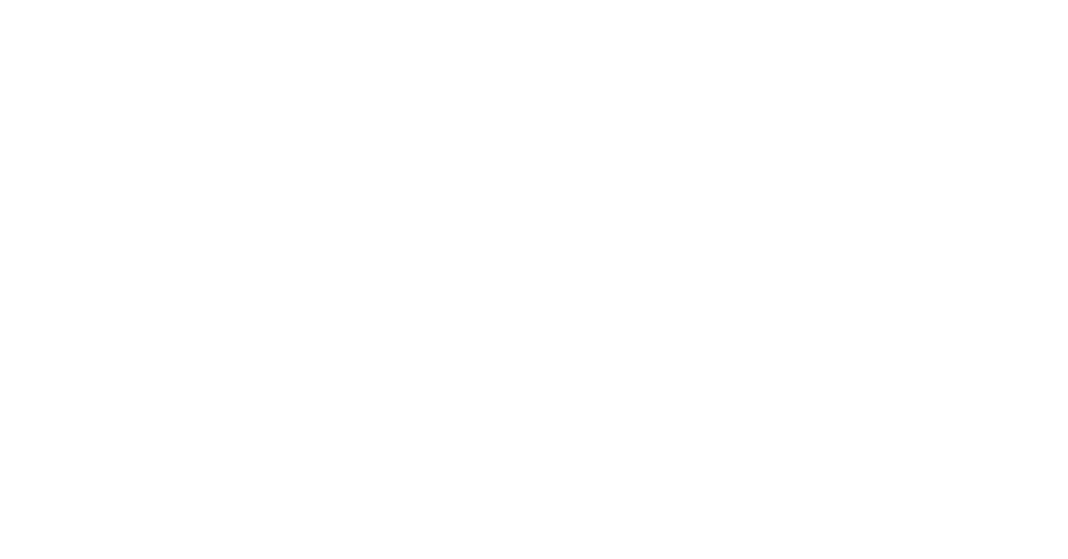
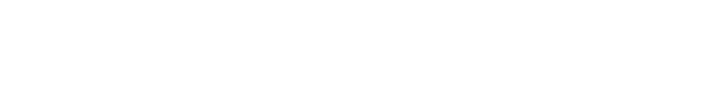
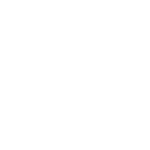
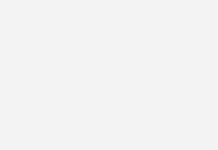
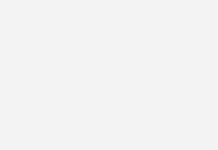
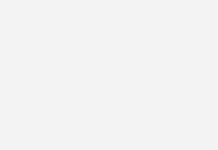
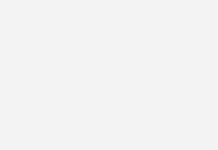
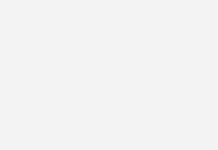

In [59]:
html

## 2. Get specific contents using BeatifulSoup

In [112]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, 'html.parser')

In [111]:
print(soup.get_text())




  









Zumper National Rent Report


































































 































 








Home
Rental Guides
Cities

NYC
Chicago
LA
SF
All Cities


Deals & Discounts
Rent Calculator
Zumper News & Insights

Research & Reports
News & Announcements


More

Lifestyle & Design
Pets


Property Management
Find an apartment
Post rentals
 


 








Search







 





 
Zumper 
Search  




 








Zumper 

Post rentals  

Find an apartment



Home
Rental Guides
Cities

NYC
Chicago
LA
SF
All Cities


Deals & Discounts
Rent Calculator
Zumper News & Insights

Research & Reports
News & Announcements


More

Lifestyle & Design
Pets


Property Management
Find an apartment
Post rentals

Search 

 






Zumper 

Zumper 



Home
Rental Guides
Cities

NYC
Chicago
LA
SF
All Cities


Deals & Discounts
Rent Calculator
Zumper News & Insights

Research & Reports
News & Announcements


More

Lifestyle & Design
Pets


Property Management
Find

### 2.1 Prettify the webpage

<!DOCTYPE html >
<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->
<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!-->
<html lang="en-US">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="https://www.zumper.com/blog/xmlrpc.php" rel="pingback"/>
  <script data-cfasync="false" data-no-defer="1">
   var ewww_webp_supported=!1;function check_webp_feature(A,e){var w;e=void 0!==e?e:function(){},ewww_webp_supported?e(ewww_webp_supported):((w=new Image).onload=function(){ewww_webp_supported=0<w.width&&0<w.height,e&&e(ewww_webp_supported)},w.onerror=function(){e&&e(!1)},w.src="data:image/webp;base64,"+{alpha:"UklGRkoAAABXRUJQVlA4WAoAAAAQAAAAAAAAAAAAQUxQSAwAAAARBxAR/Q9ERP8DAABWUDggGAAAABQBAJ0BKgEAAQAAAP4AAA3AAP7mtQAAAA=="}[A])}check_webp_feature("alpha");
  </script>
  <script data-cfasync="false" data-no-defer="1">
   var Arrive=function(c,w){"use strict";if(c.Muta
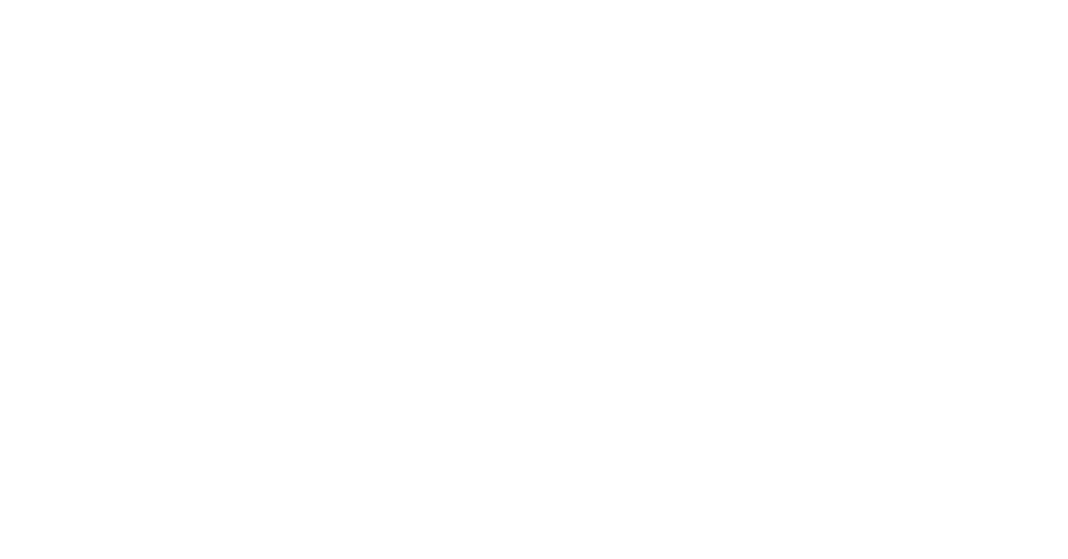
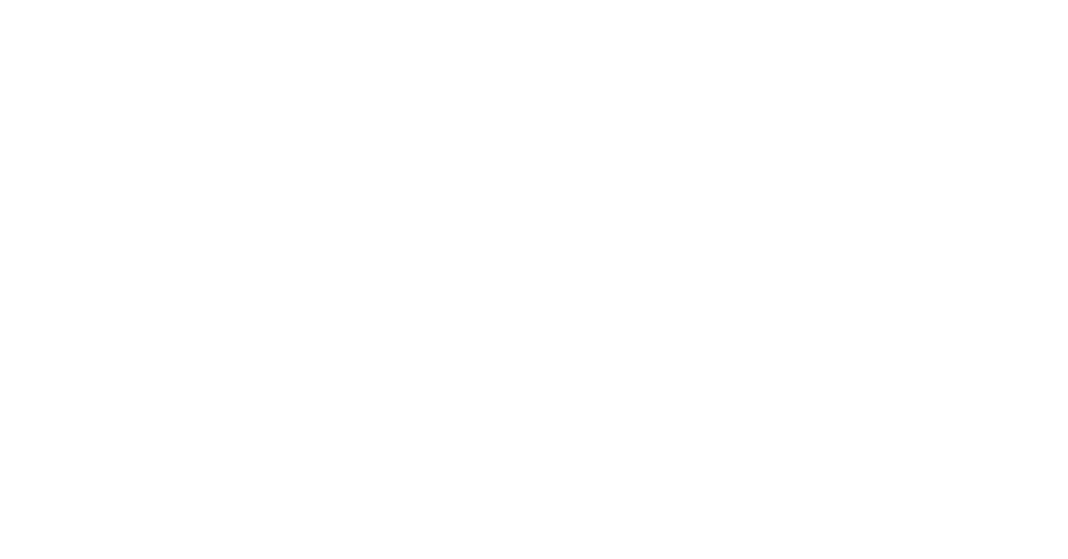
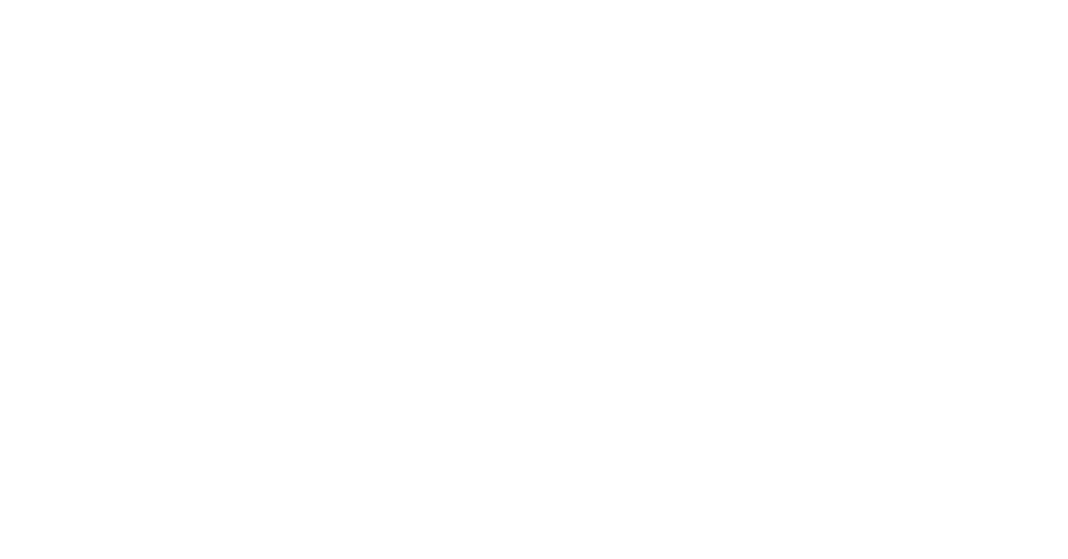
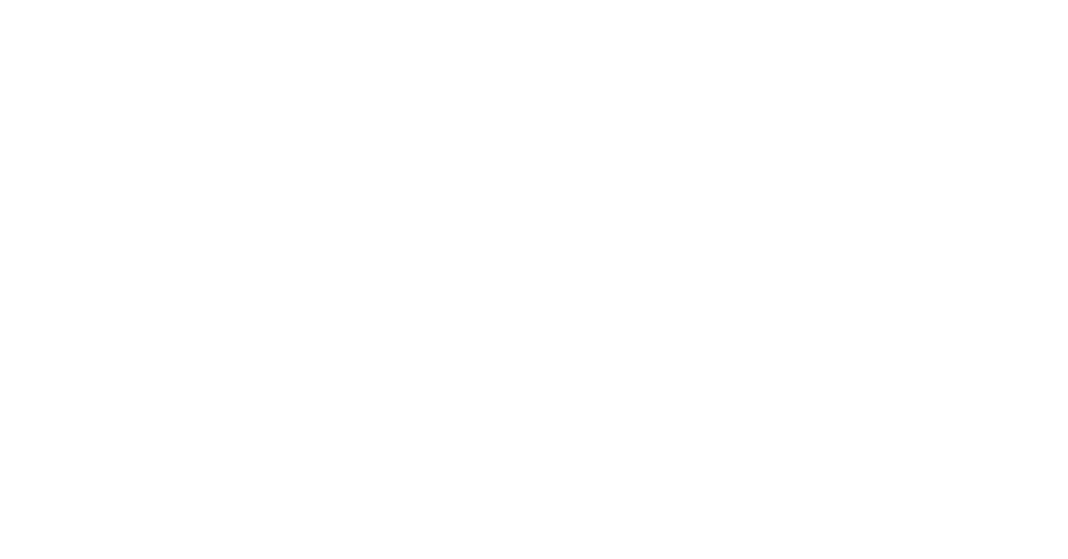
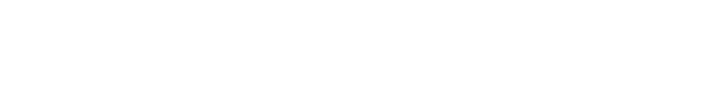

In [62]:
print(soup.prettify())

### 2.2 Get the table

You can try to remove "attrs" to see how it works.

In [113]:
paragraph = soup.find_all('table')

In [114]:
paragraph

[<table class="tablepress tablepress-id-710" id="tablepress-710">
 <thead>
 <tr class="row-1 odd">
 <th class="column-1"> </th><th class="column-2"> </th><th class="column-3">1 Bedroom</th><th class="column-4"> </th><th class="column-5"> </th><th class="column-6">2 Bedrooms</th><th class="column-7"> </th><th class="column-8"> </th><th class="column-9"> </th>
 </tr>
 </thead>
 <tbody class="row-hover">
 <tr class="row-2 even">
 <td class="column-1">Ranking</td><td class="column-2">Ranking Change</td><td class="column-3">City</td><td class="column-4">Price</td><td class="column-5">M/M%</td><td class="column-6">Y/Y%</td><td class="column-7">Price</td><td class="column-8">M/M%</td><td class="column-9">Y/Y%</td>
 </tr>
 <tr class="row-3 odd">
 <td class="column-1">1</td><td class="column-2">0</td><td class="column-3"><a href="https://www.zumper.com/apartments-for-rent/new-york-ny " rel="noopener" target="_blank">New York, NY</a></td><td class="column-4">$3,790</td><td class="column-5">-1.80

In [207]:
col_1 = pd.DataFrame(soup.find_all('td', class_='column-1'))
col_2 = pd.DataFrame(soup.find_all('td', class_='column-2'))
col_3 = pd.DataFrame(soup.find_all('td', class_='column-3'))
col_4 = pd.DataFrame(soup.find_all('td', class_='column-4'))
col_5 = pd.DataFrame(soup.find_all('td', class_='column-5'))
col_6 = pd.DataFrame(soup.find_all('td', class_='column-6'))
col_7 = pd.DataFrame(soup.find_all('td', class_='column-7'))
col_8 = pd.DataFrame(soup.find_all('td', class_='column-8'))
col_9 = pd.DataFrame(soup.find_all('td', class_='column-9'))

/Users/yaqi/miniconda3/lib/python3.9/site-packages/pandas/core/internals/construction.py:568: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [209]:
df = pd.concat([col_1, col_2,col_3,col_4,col_5,col_6,col_7,col_8, col_9], axis=1)

In [210]:
df.columns = df.iloc[0]

In [211]:
df.drop(0, inplace = True)

In [212]:
df

,Ranking,Ranking Change,City,Price,M/M%,Y/Y%,Price,M/M%,Y/Y%
1,1,0,"[New York, NY]","$3,790",-1.80%,19.20%,"$4,420",2.80%,27.00%
2,2,0,"[Boston, MA]","$3,000",-2.00%,21.50%,"$3,450",-1.40%,17.30%
3,2,1,"[San Francisco, CA]","$3,000",-0.70%,7.10%,"$4,000",-1.50%,5.30%
4,4,1,"[Miami, FL]","$2,660",6.00%,22.60%,"$3,480",2.40%,21.30%
5,5,-1,"[San Jose, CA]","$2,540",-2.30%,10.00%,"$3,140",-2.80%,11.70%
...,...,...,...,...,...,...,...,...,...
96,94,2,"[El Paso, TX]",$850,4.90%,2.40%,"$1,100",0.90%,12.20%
97,97,1,"[Lubbock, TX]",$750,4.20%,13.60%,$890,-1.10%,11.30%
98,98,-1,"[Shreveport, LA]",$730,0.00%,5.80%,$830,1.20%,5.10%
99,99,0,"[Wichita, KS]",$710,2.90%,14.50%,$860,1.20%,7.50%


In [ ]:
df.to_csv('file_name.csv')